# CME538 - Introduction to Data Science
## Team: Data Pirates
## Project 2 - Toronto Bike Share

In [1]:
# Import 3rd party libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [2]:
trips_data = pd.read_csv('trips_data.csv')

In [3]:
trips_data.head()
trips_data['User Type'].unique()

array(['Member', 'Casual', 'Annual Member', 'Casual Member'], dtype=object)

In [4]:
trips_data['User Type'] = trips_data['User Type'].replace(['Member','Casual'],['Annual Member', 'Casual Member'])
trips_data.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type
0,712441,274,7006.0,2017-01-01 00:03:00-05:00,Bay St / College St (East Side),7021.0,2017-01-01 00:08:00-05:00,Bay St / Albert St,Annual Member
1,712442,538,7046.0,2017-01-01 00:03:00-05:00,Niagara St / Richmond St W,7147.0,2017-01-01 00:12:00-05:00,King St W / Fraser Ave,Annual Member
2,712443,992,7048.0,2017-01-01 00:05:00-05:00,Front St / Yonge St (Hockey Hall of Fame),7089.0,2017-01-01 00:22:00-05:00,Church St / Wood St,Annual Member
3,712444,1005,7177.0,2017-01-01 00:09:00-05:00,East Liberty St / Pirandello St,7202.0,2017-01-01 00:26:00-05:00,Queen St W / York St (City Hall),Annual Member
4,712445,645,7203.0,2017-01-01 00:14:00-05:00,Bathurst St / Queens Quay W,7010.0,2017-01-01 00:25:00-05:00,King St W / Spadina Ave,Annual Member


In [6]:
weather_data = pd.read_csv('weather_data.csv')
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2021-12-01 00:00:00-05:00,2021,12,1,00:00,3.5,...,NaN,16.1,NaN,100.41,NaN,NaN,NaN,NaN,NaN,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2021-12-01 01:00:00-05:00,2021,12,1,01:00,3.5,...,NaN,16.1,NaN,100.50,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2021-12-01 02:00:00-05:00,2021,12,1,02:00,3.5,...,NaN,16.1,NaN,100.58,NaN,NaN,NaN,NaN,NaN,NaN
3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2021-12-01 03:00:00-05:00,2021,12,1,03:00,3.3,...,NaN,16.1,NaN,100.71,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2021-12-01 04:00:00-05:00,2021,12,1,04:00,2.7,...,NaN,16.1,NaN,100.73,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Resample data
trips_data['Start Time'] = pd.to_datetime(trips_data['Start Time'])
resampled_data_week = trips_data.set_index(trips_data['Start Time'])
resampled_data_week = resampled_data_week.resample('W').count()

# Select time and daily_rides count
Week_Time = resampled_data_week.index
Weekly_Rides = resampled_data_week['Trip Id']

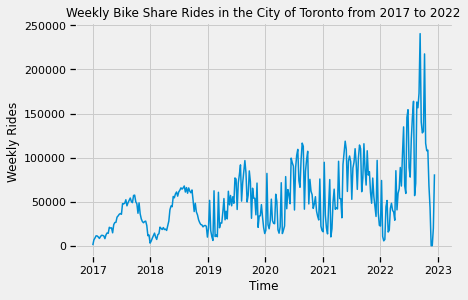

In [9]:
# Plot axis names and title
plt.xlabel('Time')
plt.ylabel('Weekly Rides ')
plt.title('Weekly Bike Share Rides in the City of Toronto from 2017 to 2022')

# Plot daily_rides versus date
sns.lineplot(x=Week_Time, y=Weekly_Rides, linewidth=1.5)
plt.show()

In [10]:
# Resample data
resampled_data_month = trips_data.set_index(trips_data['Start Time'])
resampled_data_month = resampled_data_month.resample('M').count()

# Select time and daily_rides count
Month_Time = resampled_data_month.index
Monthly_Rides = resampled_data_month['Trip Id']

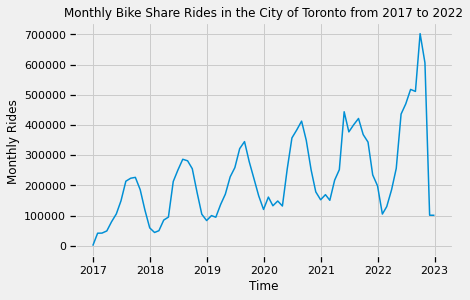

In [11]:
# Plot axis names and title
plt.xlabel('Time')
plt.ylabel('Monthly Rides ')
plt.title('Monthly Bike Share Rides in the City of Toronto from 2017 to 2022')

# Plot daily_rides versus date
sns.lineplot(x=Month_Time, y=Monthly_Rides, linewidth=1.5)
plt.show()

In [12]:
# Calculate weekly rides 
week_AnnualMembers = trips_data.loc[trips_data['User Type'] == 'Annual Member']
week_AnnualMembers = week_AnnualMembers.set_index(week_AnnualMembers['Start Time'])
week_AnnualMembers = week_AnnualMembers ['Trip Id']
week_AnnualMembers = week_AnnualMembers.resample('W').count()

week_CasualMembers = trips_data.loc[trips_data['User Type'] == 'Casual Member']
week_CasualMembers = week_CasualMembers.set_index(week_CasualMembers['Start Time'])
week_CasualMembers = week_CasualMembers ['Trip Id']
week_CasualMembers = week_CasualMembers.resample('W').count()

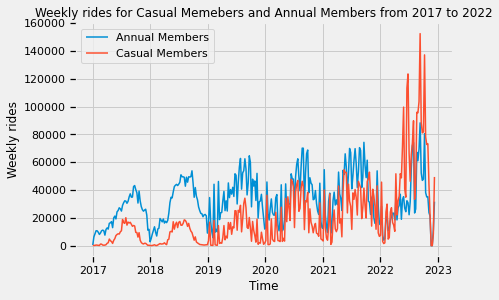

In [13]:
# Plot axis names and title
plt.xlabel('Time')
plt.ylabel('Weekly rides')
plt.title('Weekly rides for Casual Memebers and Annual Members from 2017 to 2022')

# Plot the density plot for Daily ride counts for Casual Memebers and Annual Members
plt.plot(week_AnnualMembers)
plt.plot(week_CasualMembers)
plt.legend(["Annual Members", "Casual Members"], loc ="upper left")
plt.show()

In [14]:
# Calculate monthly rides
Month_AnnualMembers = trips_data.loc[trips_data['User Type'] == 'Annual Member']
Month_AnnualMembers = Month_AnnualMembers.set_index(Month_AnnualMembers['Start Time'])
Month_AnnualMembers = Month_AnnualMembers ['Trip Id']
Month_AnnualMembers = Month_AnnualMembers.resample('M').count()

Month_CasualMembers = trips_data.loc[trips_data['User Type'] == 'Casual Member']
Month_CasualMembers = Month_CasualMembers.set_index(Month_CasualMembers['Start Time'])
Month_CasualMembers = Month_CasualMembers ['Trip Id']
Month_CasualMembers = Month_CasualMembers.resample('M').count()

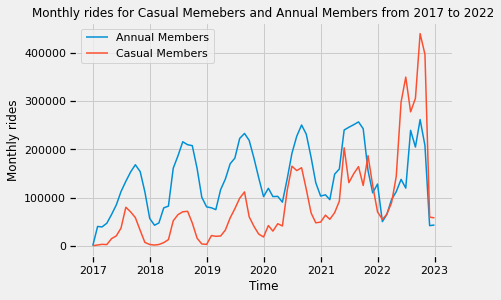

In [15]:
# Plot axis names and title
plt.xlabel('Time')
plt.ylabel('Monthly rides')
plt.title('Monthly rides for Casual Memebers and Annual Members from 2017 to 2022')

# Plot the density plot for Daily ride counts for Casual Memebers and Annual Members
plt.plot(Month_AnnualMembers)
plt.plot(Month_CasualMembers)
plt.legend(["Annual Members", "Casual Members"], loc ="upper left")
plt.show()

In [16]:
# Calculate total yearly rides 
Year_AnnualMembers = trips_data.loc[trips_data['User Type'] == 'Annual Member']
Year_AnnualMembers = Year_AnnualMembers.set_index(Year_AnnualMembers['Start Time'])
Year_AnnualMembers = Year_AnnualMembers ['Trip Id']
Year_AnnualMembers = Year_AnnualMembers.resample('Y').count()

Year_AnnualMembers = pd.DataFrame(Year_AnnualMembers)
Year_AnnualMembers['year'] = Year_AnnualMembers.index
Year_AnnualMembers['year'] = Year_AnnualMembers['year'].dt.year
Year_AnnualMembers = Year_AnnualMembers.set_index(Year_AnnualMembers['year'])
Year_AnnualMembers =Year_AnnualMembers.drop('year', axis=1)

Year_CasualMembers = trips_data.loc[trips_data['User Type'] == 'Casual Member']
Year_CasualMembers = Year_CasualMembers.set_index(Year_CasualMembers['Start Time'])
Year_CasualMembers = Year_CasualMembers ['Trip Id']
Year_CasualMembers = Year_CasualMembers.resample('Y').count()

Year_CasualMembers = pd.DataFrame(Year_CasualMembers)
Year_CasualMembers['year'] = Year_CasualMembers.index
Year_CasualMembers['year'] = Year_CasualMembers['year'].dt.year
Year_CasualMembers = Year_CasualMembers.set_index(Year_CasualMembers['year'])
Year_CasualMembers =Year_CasualMembers.drop('year', axis=1)

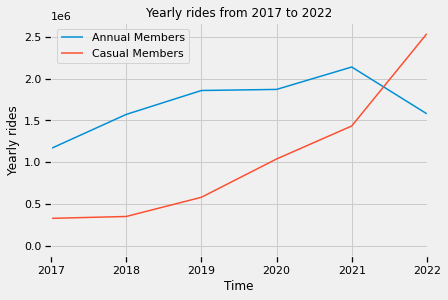

In [17]:
import numpy as np
# Plot axis names and title
plt.xlabel('Time')
plt.ylabel('Yearly rides')
plt.title('Yearly rides from 2017 to 2022')

labels = Year_AnnualMembers.index

# Plot 
plt.xticks( labels)
plt.xlim([2017, 2022])
plt.plot(labels, Year_AnnualMembers['Trip Id'])
plt.plot(labels,Year_CasualMembers['Trip Id'])
plt.legend(["Annual Members", "Casual Members"], loc ="upper left")
plt.show()


In [18]:
day_of_week = trips_data[['Start Time','User Type']]
day_of_week['Start Time'] = pd.to_datetime(day_of_week['Start Time'])
day_of_week['year'] = day_of_week['Start Time'].dt.year
day_of_week['day'] = day_of_week['Start Time'].dt.day_name()
day_of_week.head()

,Start Time,User Type,year,day
0,2017-01-01 00:03:00-05:00,Annual Member,2017,Sunday
1,2017-01-01 00:03:00-05:00,Annual Member,2017,Sunday
2,2017-01-01 00:05:00-05:00,Annual Member,2017,Sunday
3,2017-01-01 00:09:00-05:00,Annual Member,2017,Sunday
4,2017-01-01 00:14:00-05:00,Annual Member,2017,Sunday


In [19]:
def calculate_average_rides_per_weekday(year):
    # count total trips for every weekday
    df = day_of_week.loc[day_of_week['year'] == year]
    week_day_year= df.groupby(['day'])['day'].count()
    week_day_year = pd.DataFrame(week_day_year)
    week_day_year = week_day_year.rename(columns={week_day_year.columns[0]: 'ridescount'})
    
    #calculate number of every weekday(how many Mondays?)
    weekday_count_year = day_of_week.loc[day_of_week['year'] == year]
    weekday_count_year['date'] = weekday_count_year['Start Time'].dt.date
    weekday_count_year = weekday_count_year.drop_duplicates(subset='date', keep="first")
    weekday_count_year= weekday_count_year.groupby(['day'])['day'].count()
    weekday_count_year = pd.DataFrame(weekday_count_year)
    weekday_count_year = weekday_count_year.rename(columns={weekday_count_year.columns[0]: 'weekdaynumber'})
    
    df2 = pd.merge(week_day_year, weekday_count_year, left_index=True, right_index=True)
    df2['meanride_per_weekday'] = df2['ridescount']/df2['weekdaynumber']
    df2= df2['meanride_per_weekday']
    df2 = pd.DataFrame(df2)
    
    df2['Date'] = df2.index
    cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df2['Date'] = pd.Categorical(df2['Date'], categories=cats, ordered=True)
    df2 = df2.sort_values('Date')
    
    return df2 

In [20]:
df_2017 = calculate_average_rides_per_weekday(2017)
df_2018 = calculate_average_rides_per_weekday(2018)
df_2019 = calculate_average_rides_per_weekday(2019)
df_2020 = calculate_average_rides_per_weekday(2020)
df_2021 = calculate_average_rides_per_weekday(2021)
df_2022 = calculate_average_rides_per_weekday(2022)
df_2022

,meanride_per_weekday,Date
day,,
Monday,12641.904762,Monday
Tuesday,14194.707317,Tuesday
Wednesday,14406.475000,Wednesday
Thursday,14628.902439,Thursday
Friday,14673.048780,Friday
Saturday,15989.341463,Saturday
Sunday,13668.690476,Sunday


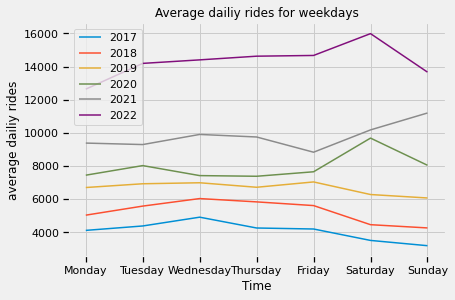

In [22]:
# Plot axis names and title
plt.xlabel('Time')
plt.ylabel('average dailiy rides')
plt.title('Average dailiy rides for weekdays')

# Plot 
plt.plot(df_2017['meanride_per_weekday'])
plt.plot(df_2018['meanride_per_weekday'])
plt.plot(df_2019['meanride_per_weekday'])
plt.plot(df_2020['meanride_per_weekday'])
plt.plot(df_2021['meanride_per_weekday'])
plt.plot(df_2022['meanride_per_weekday'])

plt.legend(["2017", "2018","2019","2020","2021","2022"])

plt.show()


In [23]:
weekday_AnnualMembers = day_of_week.loc[day_of_week['User Type'] == 'Annual Member']
weekday_AnnualMembers= weekday_AnnualMembers.groupby(['day'])['day'].count()
weekday_AnnualMembers = pd.DataFrame(weekday_AnnualMembers)
weekday_AnnualMembers = weekday_AnnualMembers.rename(columns={weekday_AnnualMembers.columns[0]: 'ridescount'})
    
#calculate number of every weekday(how many Mondays?)
weekday_count = day_of_week
weekday_count['date'] = weekday_count['Start Time'].dt.date
weekday_count = weekday_count.drop_duplicates(subset='date', keep="first")
weekday_count= weekday_count.groupby(['day'])['day'].count()
weekday_count = pd.DataFrame(weekday_count)
weekday_count = weekday_count.rename(columns={weekday_count.columns[0]: 'weekdaynumber'})
    
weekday_AnnualMembers_final = pd.merge(weekday_AnnualMembers, weekday_count, left_index=True, right_index=True)
weekday_AnnualMembers_final['meanride_per_weekday'] = weekday_AnnualMembers_final['ridescount']/weekday_AnnualMembers_final['weekdaynumber']
weekday_AnnualMembers_final= weekday_AnnualMembers_final['meanride_per_weekday']
weekday_AnnualMembers_final = pd.DataFrame(weekday_AnnualMembers_final)
    
weekday_AnnualMembers_final['Date'] = weekday_AnnualMembers_final.index
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_AnnualMembers_final['Date'] = pd.Categorical(weekday_AnnualMembers_final['Date'], categories=cats, ordered=True)
weekday_AnnualMembers_final = weekday_AnnualMembers_final.sort_values('Date')
weekday_AnnualMembers_final.head()

,meanride_per_weekday,Date
day,,
Monday,4790.580858,Monday
Tuesday,5241.847682,Tuesday
Wednesday,5233.495017,Wednesday
Thursday,5259.261589,Thursday
Friday,5036.254967,Friday


In [24]:
weekday_CasualMembers = day_of_week.loc[day_of_week['User Type'] == 'Casual Member']
weekday_CasualMembers= weekday_CasualMembers.groupby(['day'])['day'].count()
weekday_CasualMembers = pd.DataFrame(weekday_CasualMembers)
weekday_CasualMembers = weekday_CasualMembers.rename(columns={weekday_CasualMembers.columns[0]: 'ridescount'})
      
weekday_CasualMembers_final = pd.merge(weekday_CasualMembers, weekday_count, left_index=True, right_index=True)
weekday_CasualMembers_final['meanride_per_weekday'] = weekday_CasualMembers_final['ridescount']/weekday_CasualMembers_final['weekdaynumber']
weekday_CasualMembers_final= weekday_CasualMembers_final['meanride_per_weekday']
weekday_CasualMembers_final = pd.DataFrame(weekday_CasualMembers_final)
    
weekday_CasualMembers_final['Date'] = weekday_CasualMembers_final.index
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_CasualMembers_final['Date'] = pd.Categorical(weekday_CasualMembers_final['Date'], categories=cats, ordered=True)
weekday_CasualMembers_final = weekday_CasualMembers_final.sort_values('Date')
weekday_CasualMembers_final.head()


,meanride_per_weekday,Date
day,,
Monday,2593.808581,Monday
Tuesday,2605.443709,Tuesday
Wednesday,2804.049834,Wednesday
Thursday,2602.582781,Thursday
Friday,2731.549669,Friday


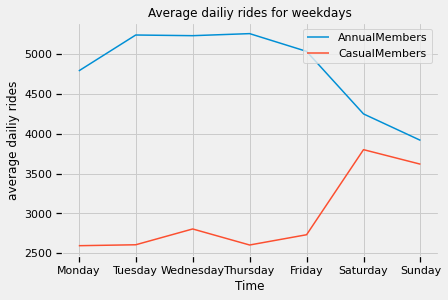

In [25]:
# Plot axis names and title
plt.xlabel('Time')
plt.ylabel('average dailiy rides')
plt.title('Average dailiy rides for weekdays')

# Plot 
plt.plot(weekday_AnnualMembers_final['meanride_per_weekday'])
plt.plot(weekday_CasualMembers_final['meanride_per_weekday'])


plt.legend(["AnnualMembers", "CasualMembers"], loc ="upper right")

plt.show()

In [26]:
month_of_year = trips_data[['Start Time','User Type']]
month_of_year['Start Time'] = pd.to_datetime(month_of_year['Start Time'])
month_of_year['year'] = month_of_year['Start Time'].dt.year
month_of_year['month'] = month_of_year['Start Time'].dt.month_name()
month_of_year.head()

,Start Time,User Type,year,month
0,2017-01-01 00:03:00-05:00,Annual Member,2017,January
1,2017-01-01 00:03:00-05:00,Annual Member,2017,January
2,2017-01-01 00:05:00-05:00,Annual Member,2017,January
3,2017-01-01 00:09:00-05:00,Annual Member,2017,January
4,2017-01-01 00:14:00-05:00,Annual Member,2017,January


In [27]:
def calculate_total_rides_month(year):
    # count total trips for every weekday
    df = month_of_year.loc[day_of_week['year'] == year]
    month_rides_year= df.groupby(['month'])['month'].count()
    month_rides_year = pd.DataFrame(month_rides_year)
    month_rides_year = month_rides_year.rename(columns={month_rides_year.columns[0]: 'ridescount'})
    
    df2 = month_rides_year
    df2['month_'] = df2.index
    cats = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August','September',
           'October', 'November','December' ]
    df2['month_'] = pd.Categorical(df2['month_'], categories=cats, ordered=True)
    df2 = df2.sort_values('month_')
    
    return df2

calculate_total_rides_month(2018)

,ridescount,month_
month,,
January,43859,January
February,49731,February
March,84969,March
April,94783,April
May,212750,May
June,250837,June
July,286316,July
August,281219,August
September,255001,September


In [28]:
df_2017_M = calculate_total_rides_month(2017)
df_2018_M = calculate_total_rides_month(2018)
df_2019_M = calculate_total_rides_month(2019)
df_2020_M = calculate_total_rides_month(2020)
df_2021_M = calculate_total_rides_month(2021)
df_2022_M = calculate_total_rides_month(2022)

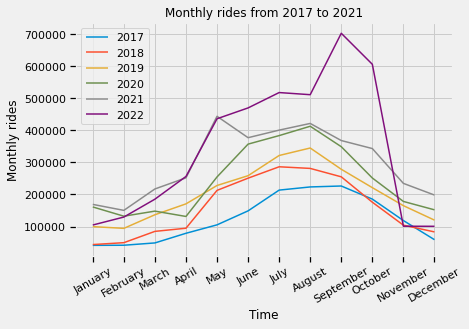

In [29]:
# Plot axis names and title
plt.xlabel('Time')
plt.ylabel('Monthly rides')
plt.title('Monthly rides from 2017 to 2021')

# Plot 
plt.plot(df_2017_M['ridescount'])
plt.plot(df_2018_M['ridescount'])
plt.plot(df_2019_M['ridescount'])
plt.plot(df_2020_M['ridescount'])
plt.plot(df_2021_M['ridescount'])
plt.plot(df_2022_M['ridescount'])

plt.xticks(rotation=30)

plt.legend(["2017", "2018","2019","2020","2021","2022"])

plt.show()

In [30]:
month_AnnualMembers = month_of_year.loc[month_of_year['User Type'] == 'Annual Member']
month_AnnualMembers= month_AnnualMembers.groupby(['month'])['month'].count()
month_AnnualMembers = pd.DataFrame(month_AnnualMembers)
month_AnnualMembers = month_AnnualMembers.rename(columns={month_AnnualMembers.columns[0]: 'ridescount'})
    
month_AnnualMembers['month_'] = month_AnnualMembers.index
cats = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August','September',
           'October', 'November','December' ]
month_AnnualMembers['month_'] = pd.Categorical(month_AnnualMembers['month_'], categories=cats, ordered=True)
month_AnnualMembers = month_AnnualMembers.sort_values('month_')

month_AnnualMembers['ridescount'] = month_AnnualMembers['ridescount']/6

month_AnnualMembers.head()

,ridescount,month_
month,,
January,72670.333333,January
February,70558.000000,February
March,98135.833333,March
April,107828.333333,April
May,155575.000000,May


In [31]:
month_CasualMembers = month_of_year.loc[month_of_year['User Type'] == 'Casual Member']
month_CasualMembers= month_CasualMembers.groupby(['month'])['month'].count()
month_CasualMembers = pd.DataFrame(month_CasualMembers)
month_CasualMembers = month_CasualMembers.rename(columns={month_CasualMembers.columns[0]: 'ridescount'})
    
month_CasualMembers['month_'] = month_CasualMembers.index
cats = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August','September',
           'October', 'November','December' ]
month_CasualMembers['month_'] = pd.Categorical(month_CasualMembers['month_'], categories=cats, ordered=True)
month_CasualMembers = month_CasualMembers.sort_values('month_')

month_CasualMembers['ridescount'] = month_CasualMembers['ridescount']/6

month_CasualMembers.head()

,ridescount,month_
month,,
January,30668.333333,January
February,29141.833333,February
March,38750.666667,March
April,56165.000000,April
May,124488.000000,May


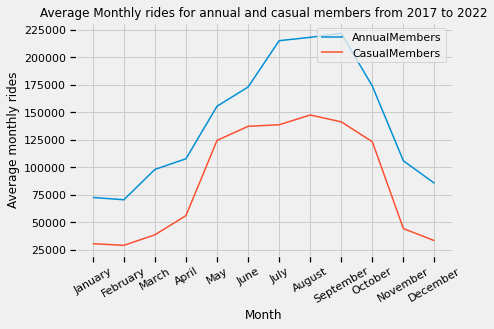

In [32]:
# Plot axis names and title
plt.xlabel('Month')
plt.ylabel('Average monthly rides')
plt.title('Average Monthly rides for annual and casual members from 2017 to 2022')

# Plot 
plt.plot(month_AnnualMembers['ridescount'])
plt.plot(month_CasualMembers['ridescount'])

plt.xticks(rotation=30)

plt.legend(["AnnualMembers", "CasualMembers"], loc ="upper right")

plt.show()

In [33]:
trips_data = trips_data.loc[trips_data['Trip Duration'] >= 60]
month_of_year = trips_data[['Start Time','User Type','Trip Duration']]
month_of_year.head()

,Start Time,User Type,Trip Duration
0,2017-01-01 00:03:00-05:00,Annual Member,274
1,2017-01-01 00:03:00-05:00,Annual Member,538
2,2017-01-01 00:05:00-05:00,Annual Member,992
3,2017-01-01 00:09:00-05:00,Annual Member,1005
4,2017-01-01 00:14:00-05:00,Annual Member,645


In [34]:
resampled_duration_month = month_of_year.resample('M', on='Start Time').mean()
resampled_duration_month['time'] = resampled_duration_month.index
resampled_duration_month['year'] = resampled_duration_month['time'].dt.year
resampled_duration_month = resampled_duration_month.iloc[1:]
resampled_duration_month['month'] = resampled_duration_month['time'].dt.month_name()
resampled_duration_month = resampled_duration_month.drop(['time'],
                       axis = 1)
resampled_duration_month = resampled_duration_month.set_index('month')
resampled_duration_month 

,Trip Duration,year
month,,
January,648.503972,2017
February,721.258587,2017
March,663.988461,2017
April,939.269050,2017
May,915.265340,2017
...,...,...
August,1018.848263,2022
September,979.948673,2022
October,882.039553,2022


In [35]:
duration_2017 = resampled_duration_month.loc[resampled_duration_month['year'] == 2017]
duration_2018 = resampled_duration_month.loc[resampled_duration_month['year'] == 2018]
duration_2019 = resampled_duration_month.loc[resampled_duration_month['year'] == 2019]
duration_2020 = resampled_duration_month.loc[resampled_duration_month['year'] == 2020]
duration_2021 = resampled_duration_month.loc[resampled_duration_month['year'] == 2021]
duration_2022 = resampled_duration_month.loc[resampled_duration_month['year'] == 2022]

duration_2017

,Trip Duration,year
month,,
January,648.503972,2017
February,721.258587,2017
March,663.988461,2017
April,939.269050,2017
May,915.265340,2017
June,986.142005,2017
July,1361.150250,2017
August,1320.298279,2017
September,1152.244576,2017


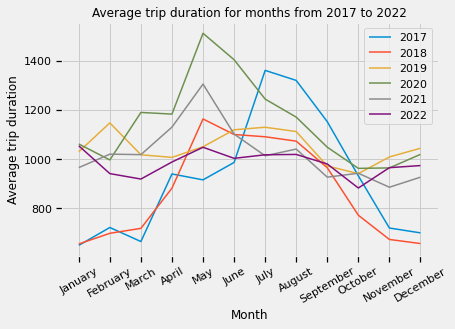

In [36]:
# Plot axis names and title
plt.xlabel('Month')
plt.ylabel('Average trip duration')
plt.title('Average trip duration for months from 2017 to 2022')

# Plot 
plt.plot(duration_2017['Trip Duration'])
plt.plot(duration_2018['Trip Duration'])
plt.plot(duration_2019['Trip Duration'])
plt.plot(duration_2020['Trip Duration'])
plt.plot(duration_2021['Trip Duration'])
plt.plot(duration_2022['Trip Duration'])

plt.xticks(rotation=30)
plt.legend(["2017", "2018","2019","2020","2021","2022"])

plt.show()

In [37]:
duration_AnnualMembers = month_of_year.loc[month_of_year['User Type'] == 'Annual Member']

duration_AnnualMembers['month'] = duration_AnnualMembers['Start Time'].dt.month_name()
duration_AnnualMembers= duration_AnnualMembers.groupby(['month'])['Trip Duration'].mean()
duration_AnnualMembers = pd.DataFrame(duration_AnnualMembers)
duration_AnnualMembers = duration_AnnualMembers.rename(columns={duration_AnnualMembers.columns[0]: 'durationmean'})

duration_AnnualMembers['month_'] = duration_AnnualMembers.index
cats = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August','September',
           'October', 'November','December' ]
duration_AnnualMembers['month_'] = pd.Categorical(duration_AnnualMembers['month_'], categories=cats, ordered=True)
duration_AnnualMembers = duration_AnnualMembers.sort_values('month_')


duration_AnnualMembers

,durationmean,month_
month,,
January,731.317646,January
February,723.814316,February
March,723.720816,March
April,756.633489,April
May,791.154407,May
June,788.810776,June
July,783.604508,July
August,773.542464,August
September,743.862785,September


In [38]:
duration_CasualMembers = month_of_year.loc[month_of_year['User Type'] == 'Casual Member']

duration_CasualMembers['month'] = duration_CasualMembers['Start Time'].dt.month_name()
duration_CasualMembers= duration_CasualMembers.groupby(['month'])['Trip Duration'].mean()
duration_CasualMembers = pd.DataFrame(duration_CasualMembers)
duration_CasualMembers = duration_CasualMembers.rename(columns={duration_CasualMembers.columns[0]: 'durationmean'})

duration_CasualMembers['month_'] = duration_CasualMembers.index
cats = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August','September',
           'October', 'November','December' ]
duration_CasualMembers['month_'] = pd.Categorical(duration_CasualMembers['month_'], categories=cats, ordered=True)
duration_CasualMembers = duration_CasualMembers.sort_values('month_')


duration_CasualMembers

,durationmean,month_
month,,
January,1542.273557,January
February,1565.104199,February
March,1607.955458,March
April,1582.642257,April
May,1695.692324,May
June,1555.054400,June
July,1639.295373,July
August,1591.860283,August
September,1393.502635,September


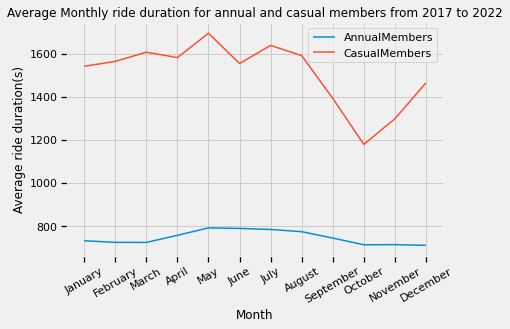

In [39]:
# Plot axis names and title
plt.xlabel('Month')
plt.ylabel('Average ride duration(s)')
plt.title('Average Monthly ride duration for annual and casual members from 2017 to 2022')

# Plot 
plt.plot(duration_AnnualMembers['durationmean'])
plt.plot(duration_CasualMembers['durationmean'])

plt.xticks(rotation=30)

plt.legend(["AnnualMembers", "CasualMembers"], loc ="upper right")

plt.show()

In [40]:
workday_analysis = trips_data[['Start Time','User Type','Trip Duration']]

def ifworkday(timeinput):

    if timeinput.weekday() < 5:
        output = "True"
    else:  # 5 Sat, 6 Sun
        output = "False"
    return output

workday_analysis['workday'] = workday_analysis['Start Time'].apply(ifworkday)
workday_analysis.head()

,Start Time,User Type,Trip Duration,workday
0,2017-01-01 00:03:00-05:00,Annual Member,274,False
1,2017-01-01 00:03:00-05:00,Annual Member,538,False
2,2017-01-01 00:05:00-05:00,Annual Member,992,False
3,2017-01-01 00:09:00-05:00,Annual Member,1005,False
4,2017-01-01 00:14:00-05:00,Annual Member,645,False


In [41]:
# Remove extra colunns and reset index
workday_analysis = workday_analysis.set_index(workday_analysis['Start Time'])
workday_analysis = workday_analysis.drop('Start Time', axis=1)

# Count rides of annual members for each day
workday_analysis_Annual = workday_analysis.loc[workday_analysis['User Type'] == 'Annual Member']
workday_analysis_Annual = workday_analysis_Annual.groupby(by=workday_analysis_Annual.index.date).agg(annual_members=('Trip Duration','count'))

# Count rides of casual members for each day
workday_analysis_Casual = workday_analysis.loc[workday_analysis['User Type'] == 'Casual Member']
workday_analysis_Casual = workday_analysis_Casual.groupby(by=workday_analysis_Casual.index.date).agg(casual_members=('Trip Duration','count'))

data_days = pd.merge(workday_analysis_Annual,workday_analysis_Casual, how='outer', left_index=True, right_index=True)

# View DataFrame
workday_analysis.head()
data_days.head()

,annual_members,casual_members
2016-12-31,57,1.0
2017-01-01,418,85.0
2017-01-02,762,91.0
2017-01-03,853,18.0
2017-01-04,1364,37.0


In [42]:
data_days['Start Time'] = data_days.index
data_days['Start Time'] = pd.to_datetime(data_days['Start Time'])
data_days['workday'] = data_days['Start Time'].apply(ifworkday)
data_days.head()

,annual_members,casual_members,Start Time,workday
2016-12-31,57,1.0,2016-12-31,False
2017-01-01,418,85.0,2017-01-01,False
2017-01-02,762,91.0,2017-01-02,True
2017-01-03,853,18.0,2017-01-03,True
2017-01-04,1364,37.0,2017-01-04,True


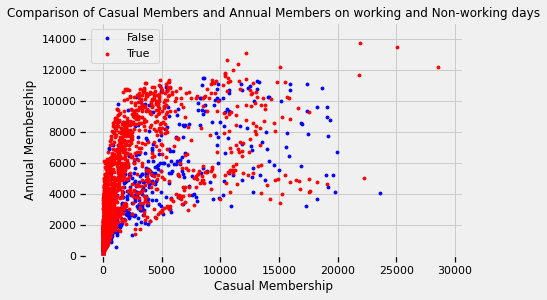

In [43]:
# Select workday data
workday_False = data_days.loc[data_days['workday']=='False']
workday_True = data_days.loc[data_days['workday']=='True']

# Plot axis names and title
plt.xlabel('Casual Membership')
plt.ylabel('Annual Membership')
plt.title('Comparison of Casual Members and Annual Members on working and Non-working days')

# Plot the scatter plot 
plt.scatter(workday_False['casual_members'], workday_False['annual_members'], color='b',s=8)
plt.scatter(workday_True['casual_members'], workday_True['annual_members'], color='r',s=8)
plt.ylim([0, 15000])
plt.legend(["False", "True"], loc ="upper left")
plt.show()

In [44]:
# Count rides of annual members for each hour
data_hours_Annual = workday_analysis.loc[workday_analysis['User Type'] == 'Annual Member']
data_hours_Annual = data_hours_Annual.groupby(by=data_hours_Annual.index.hour).agg(annual_members=('Trip Duration','count'))

# Count rides of casual members for each hour
data_hours_casual = workday_analysis.loc[workday_analysis['User Type'] == 'Casual Member']
data_hours_casual = data_hours_casual.groupby(by=data_hours_casual.index.hour).agg(casual_members=('Trip Duration','count'))

# Combine DataFrame
data_hours = pd.merge(data_hours_Annual,data_hours_casual, how='outer', left_index=True, right_index=True)

# View DataFrame
data_hours.head()


,annual_members,casual_members
Start Time,,
0,112702,101897
1,68999,66606
2,46536,48737
3,24886,25560
4,20675,14980


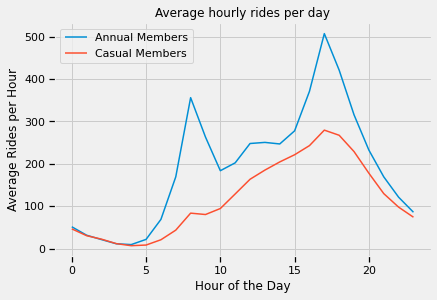

In [45]:
# Calculate averge hourly rides per day
mean_hourly_AnnualMembers = data_hours['annual_members']/(365*6)
mean_hourly_CasualMembers = data_hours['casual_members']/(365*6)

# Plot axis names and title
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rides per Hour')
plt.title('Average hourly rides per day')

# Plot the density plot for Daily ride counts for Casual Memebers and Annual Members
plt.plot(mean_hourly_AnnualMembers)
plt.plot(mean_hourly_CasualMembers)
plt.legend(["Annual Members", "Casual Members"], loc ="upper left")
plt.show()

In [46]:
# Function to round to nearest hour 
# Import 3rd party libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')
def rounding_hour(t):
    
    # From https://www.codesprogram.com/questions/58651/python-datetime-round-to-nearest-hour
    
    return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +timedelta(hours=t.minute//30))

# Round 'Start Time'
trips_data['merge_time'] = trips_data['Start Time'].apply(rounding_hour)

In [ ]:
weather_data = pd.read_csv('weather_data.csv')

In [47]:
weather_data.rename(columns = {'Temp (°C)':'Temp', 'Wind Spd (km/h)':'Wind Spd',
                              'Visibility (km)':'Visibility'}, inplace = True)
weather_data = weather_data[['Date/Time','Temp','Wind Spd','Visibility','Weather']]
weather_data.head()

,Date/Time,Temp,Wind Spd,Visibility,Weather
0,2021-12-01 00:00:00-05:00,3.5,24.0,16.1,NaN
1,2021-12-01 01:00:00-05:00,3.5,28.0,16.1,NaN
2,2021-12-01 02:00:00-05:00,3.5,28.0,16.1,NaN
3,2021-12-01 03:00:00-05:00,3.3,24.0,16.1,NaN
4,2021-12-01 04:00:00-05:00,2.7,21.0,16.1,NaN


In [48]:
weather_data.isnull().sum()

Date/Time         0
Temp            386
Wind Spd         78
Visibility       89
Weather       43553
dtype: int64

In [49]:
weather_data['merge_time'] = pd.to_datetime(weather_data['Date/Time'])
weather_data['merge_time']

0       2021-12-01 00:00:00-05:00
1       2021-12-01 01:00:00-05:00
2       2021-12-01 02:00:00-05:00
3       2021-12-01 03:00:00-05:00
4       2021-12-01 04:00:00-05:00
                   ...           
51115   2017-01-31 19:00:00-05:00
51116   2017-01-31 20:00:00-05:00
51117   2017-01-31 21:00:00-05:00
51118   2017-01-31 22:00:00-05:00
51119   2017-01-31 23:00:00-05:00
Name: merge_time, Length: 51120, dtype: datetime64[ns, pytz.FixedOffset(-300)]

In [50]:
data_merged = pd.merge(trips_data, weather_data, on='merge_time', how="left")


# View DataFrame
data_merged.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type,merge_time,Date/Time,Temp,Wind Spd,Visibility,Weather
0,712441,274,7006.0,2017-01-01 00:03:00-05:00,Bay St / College St (East Side),7021.0,2017-01-01 00:08:00-05:00,Bay St / Albert St,Annual Member,2017-01-01 00:00:00-05:00,2017-01-01 00:00:00-05:00,1.5,39.0,16.1,NaN
1,712442,538,7046.0,2017-01-01 00:03:00-05:00,Niagara St / Richmond St W,7147.0,2017-01-01 00:12:00-05:00,King St W / Fraser Ave,Annual Member,2017-01-01 00:00:00-05:00,2017-01-01 00:00:00-05:00,1.5,39.0,16.1,NaN
2,712443,992,7048.0,2017-01-01 00:05:00-05:00,Front St / Yonge St (Hockey Hall of Fame),7089.0,2017-01-01 00:22:00-05:00,Church St / Wood St,Annual Member,2017-01-01 00:00:00-05:00,2017-01-01 00:00:00-05:00,1.5,39.0,16.1,NaN
3,712444,1005,7177.0,2017-01-01 00:09:00-05:00,East Liberty St / Pirandello St,7202.0,2017-01-01 00:26:00-05:00,Queen St W / York St (City Hall),Annual Member,2017-01-01 00:00:00-05:00,2017-01-01 00:00:00-05:00,1.5,39.0,16.1,NaN
4,712445,645,7203.0,2017-01-01 00:14:00-05:00,Bathurst St / Queens Quay W,7010.0,2017-01-01 00:25:00-05:00,King St W / Spadina Ave,Annual Member,2017-01-01 00:00:00-05:00,2017-01-01 00:00:00-05:00,1.5,39.0,16.1,NaN


In [51]:
data_merged = data_merged.set_index(data_merged['merge_time'])


# Set the time to have a resolution of 1 hour
data_merged['Start Time'] = data_merged['Start Time'].dt.floor('H')
# Count hourly_rides
hourly_rides = data_merged.groupby(data_merged['Start Time']).agg(rides=('Trip Id','count'))

# Count hourly_annual
data_merged_annual = data_merged.loc[data_merged['User Type'] == 'Annual Member']
hourly_annual = data_merged_annual.groupby(data_merged_annual['Start Time']).agg(annual_members=('Trip Id','count'))

# Count hourly_casual
data_merged_casual = data_merged.loc[data_merged['User Type'] == 'Casual Member']
hourly_casual = data_merged_casual.groupby(data_merged_casual['Start Time']).agg(casual_members=('Trip Id','count'))

# Combine DataFrames for rides, annual, and casual.
hourly_rides_and_weather = pd.merge(hourly_rides,hourly_annual, how='outer', left_index=True, right_index=True)
hourly_rides_and_weather = pd.merge(hourly_rides_and_weather,hourly_casual, how='outer', left_index=True, right_index=True)
hourly_rides_and_weather = hourly_rides_and_weather.fillna(0)
# add workday column
hourly_rides_and_weather['workday'] = hourly_rides_and_weather.index
hourly_rides_and_weather['workday'] = hourly_rides_and_weather['workday'].apply(ifworkday)

# View DataFrame
hourly_rides_and_weather.head(10)

,rides,annual_members,casual_members,workday
Start Time,,,,
2016-12-31 20:00:00-05:00,19,19.0,0.0,False
2016-12-31 21:00:00-05:00,14,13.0,1.0,False
2016-12-31 22:00:00-05:00,10,10.0,0.0,False
2016-12-31 23:00:00-05:00,15,15.0,0.0,False
2017-01-01 00:00:00-05:00,18,16.0,2.0,False
2017-01-01 01:00:00-05:00,13,13.0,0.0,False
2017-01-01 02:00:00-05:00,15,15.0,0.0,False
2017-01-01 03:00:00-05:00,10,8.0,2.0,False
2017-01-01 04:00:00-05:00,5,5.0,0.0,False


In [52]:
hourly_rides_and_weather['merge_time'] = hourly_rides_and_weather.index
final= pd.merge(hourly_rides_and_weather, weather_data, on='merge_time', how="right")
final['Weather'].fillna('clear', inplace=True)
final.head(20)

,rides,annual_members,casual_members,workday,merge_time,Date/Time,Temp,Wind Spd,Visibility,Weather
0,27.0,13.0,14.0,True,2021-12-01 00:00:00-05:00,2021-12-01 00:00:00-05:00,3.5,24.0,16.1,clear
1,9.0,5.0,4.0,True,2021-12-01 01:00:00-05:00,2021-12-01 01:00:00-05:00,3.5,28.0,16.1,clear
2,3.0,3.0,0.0,True,2021-12-01 02:00:00-05:00,2021-12-01 02:00:00-05:00,3.5,28.0,16.1,clear
3,3.0,3.0,0.0,True,2021-12-01 03:00:00-05:00,2021-12-01 03:00:00-05:00,3.3,24.0,16.1,clear
4,12.0,6.0,6.0,True,2021-12-01 04:00:00-05:00,2021-12-01 04:00:00-05:00,2.7,21.0,16.1,clear
5,8.0,6.0,2.0,True,2021-12-01 05:00:00-05:00,2021-12-01 05:00:00-05:00,2.6,18.0,16.1,clear
6,61.0,54.0,7.0,True,2021-12-01 06:00:00-05:00,2021-12-01 06:00:00-05:00,2.5,11.0,16.1,clear
7,145.0,117.0,28.0,True,2021-12-01 07:00:00-05:00,2021-12-01 07:00:00-05:00,2.8,24.0,16.1,clear
8,189.0,153.0,36.0,True,2021-12-01 08:00:00-05:00,2021-12-01 08:00:00-05:00,2.2,18.0,16.1,clear
9,129.0,102.0,27.0,True,2021-12-01 09:00:00-05:00,2021-12-01 09:00:00-05:00,2.3,22.0,16.1,clear


['clear' 'Rain' 'Fog' 'Rain,Snow' 'Snow' 'Rain,Fog' 'Haze'
 'Moderate Rain,Fog' 'Freezing Rain,Snow' 'Freezing Rain,Fog'
 'Freezing Rain' 'Moderate Rain' 'Thunderstorms,Rain'
 'Thunderstorms,Heavy Rain,Fog' 'Heavy Rain,Fog' 'Thunderstorms'
 'Thunderstorms,Moderate Rain,Fog' 'Thunderstorms,Heavy Rain'
 'Thunderstorms,Moderate Rain' 'Thunderstorms,Fog'
 'Thunderstorms,Rain,Fog' 'Moderate Snow' 'Heavy Snow' 'Snow,Blowing Snow'
 'Haze,Blowing Snow']
['clear' 'Rain' 'Fog/Haze' 'Snow' 'Rain&fog']


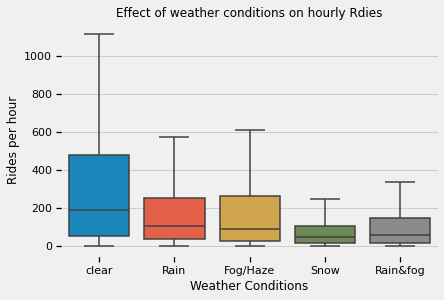

In [53]:
final_plot = final
print(final_plot['Weather'].unique())
final_plot['Weather'] = final_plot['Weather'] .replace(['Moderate Rain','Thunderstorms','Thunderstorms,Rain','Freezing Rain','Thunderstorms,Moderate Rain','Thunderstorms,Heavy Rain'], 
                                                       'Rain')
final_plot['Weather'] = final_plot['Weather'] .replace(['Moderate Rain,Fog','Freezing Rain,Fog','Heavy Rain,Fog','Thunderstorms,Heavy Rain,Fog','Thunderstorms,Rain,Fog','Thunderstorms,Moderate Rain,Fog'], 
                                                       'Rain&fog')
final_plot['Weather'] = final_plot['Weather'] .replace(['Rain,Fog'], 'Rain&fog')
final_plot['Weather'] = final_plot['Weather'] .replace(['Fog','Thunderstorms,Fog'], 'Fog/Haze')
final_plot['Weather'] = final_plot['Weather'] .replace(['Haze'], 'Fog/Haze')
final_plot['Weather'] = final_plot['Weather'] .replace(['Haze,Blowing Snow','Snow,Blowing Snow',
                                                       'Freezing Rain,Snow','Heavy Snow','Moderate Snow','Rain,Snow'], 'Snow')
print(final_plot['Weather'].unique())
# Plot the violin plot 
sns.boxplot(x=final['Weather'], y=final['rides'],showfliers=False)

plt.xlabel('Weather Conditions')
plt.ylabel('Rides per hour')
plt.title('Effect of weather conditions on hourly Rdies')

plt.show()

34.1
34.1


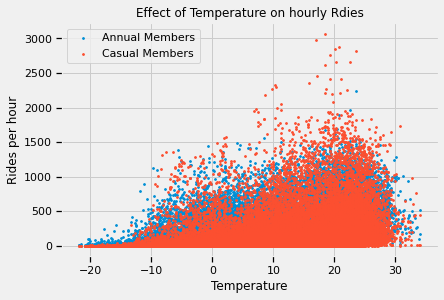

In [54]:
weather_data = pd.read_csv('weather_data.csv')
print(final_plot['Temp'].max())
print(weather_data['Temp (°C)'].max())

weather_data = pd.read_csv('weather_data.csv')

# Plot axis names and title
plt.xlabel('Temperature')
plt.ylabel('Rides per hour')
plt.title('Effect of Temperature on hourly Rdies')

# Plot the density plot for Daily ride counts for Casual Memebers and Annual Members
plt.scatter(final_plot['Temp'], final_plot['annual_members'],s=3)
plt.scatter(final_plot['Temp'], final_plot['casual_members'],s=3)
plt.legend(["Annual Members", "Casual Members"], loc ="upper left")
plt.show()

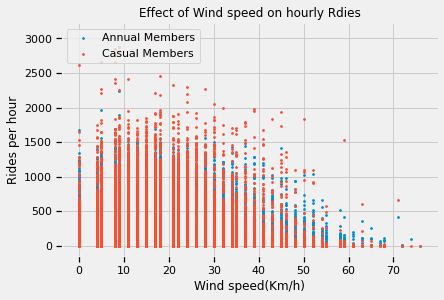

In [55]:
# Plot axis names and title
plt.xlabel('Wind speed(Km/h)')
plt.ylabel('Rides per hour')
plt.title('Effect of Wind speed on hourly Rdies')

# Plot the density plot for Daily ride counts for Casual Memebers and Annual Members
plt.scatter(final_plot['Wind Spd'], final_plot['annual_members'],s=3)
plt.scatter(final_plot['Wind Spd'], final_plot['casual_members'],s=3)
plt.legend(["Annual Members", "Casual Members"], loc ="upper left")
plt.show()

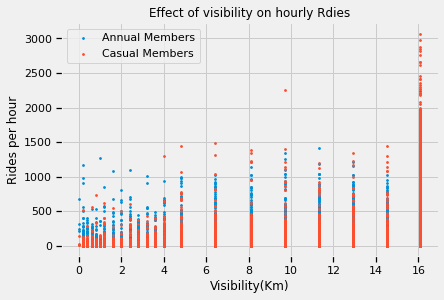

In [56]:

# Plot the density plot for Daily ride counts for Casual Memebers and Annual Members
plt.scatter(final_plot['Visibility'], final_plot['annual_members'],s=3)
plt.scatter(final_plot['Visibility'], final_plot['casual_members'],s=3)
# Plot axis names and title
plt.xlabel('Visibility(Km)')
plt.ylabel('Rides per hour')
plt.title('Effect of visibility on hourly Rdies')
plt.legend(["Annual Members", "Casual Members"], loc ="upper left")

plt.show()

In [57]:
# Count hourly_annual
data_merged_annual= data_merged.loc[data_merged['User Type'] == 'Annual Member']
hourly_annual_duration = data_merged_annual.groupby(data_merged_annual['Start Time']).agg(annual_members=('Trip Duration','mean'))

# Count hourly_casual
data_merged_casual = data_merged.loc[data_merged['User Type'] == 'Casual Member']
hourly_casual_duration = data_merged_casual.groupby(data_merged_casual['Start Time']).agg(casual_members=('Trip Duration','mean'))


hourly_duration = pd.merge(hourly_annual_duration,hourly_casual_duration, how='outer', left_index=True, right_index=True)
hourly_duration['merge_time'] = hourly_duration.index
final_duration= pd.merge(final, hourly_duration, on='merge_time')

final_duration['casual_members_y'] = final_duration['casual_members_y'].fillna(0)
final_duration.head()

,rides,annual_members_x,casual_members_x,workday,merge_time,Date/Time,Temp,Wind Spd,Visibility,Weather,annual_members_y,casual_members_y
0,27.0,13.0,14.0,True,2021-12-01 00:00:00-05:00,2021-12-01 00:00:00-05:00,3.5,24.0,16.1,clear,531.923077,870.285714
1,9.0,5.0,4.0,True,2021-12-01 01:00:00-05:00,2021-12-01 01:00:00-05:00,3.5,28.0,16.1,clear,569.800000,1650.250000
2,3.0,3.0,0.0,True,2021-12-01 02:00:00-05:00,2021-12-01 02:00:00-05:00,3.5,28.0,16.1,clear,658.666667,0.000000
3,3.0,3.0,0.0,True,2021-12-01 03:00:00-05:00,2021-12-01 03:00:00-05:00,3.3,24.0,16.1,clear,631.666667,0.000000
4,12.0,6.0,6.0,True,2021-12-01 04:00:00-05:00,2021-12-01 04:00:00-05:00,2.7,21.0,16.1,clear,360.833333,566.166667


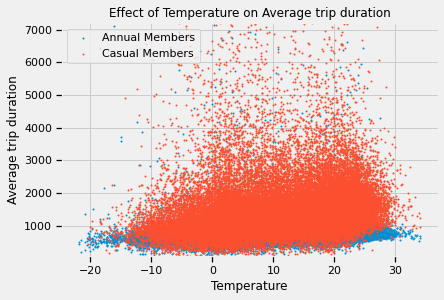

In [58]:
# Plot axis names and title
plt.xlabel('Temperature')
plt.ylabel('Average trip duration')
plt.title('Effect of Temperature on Average trip duration')


# Plot the density plot for Daily ride counts for Casual Memebers and Annual Members
plt.scatter(final_duration['Temp'], final_duration['annual_members_y'],s=1)
plt.scatter(final_duration['Temp'], final_duration['casual_members_y'],s=1)
plt.legend(["Annual Members", "Casual Members"], loc ="upper left")
ax = plt.gca()
ax.set_ylim([60, 7200])
plt.show()

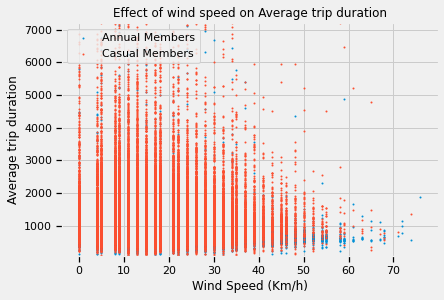

In [59]:
# Plot axis names and title
plt.xlabel('Wind Speed (Km/h)')
plt.ylabel('Average trip duration')
plt.title('Effect of wind speed on Average trip duration')


# Plot the density plot for Daily ride counts for Casual Memebers and Annual Members
plt.scatter(final_duration['Wind Spd'], final_duration['annual_members_y'],s=1)
plt.scatter(final_duration['Wind Spd'], final_duration['casual_members_y'],s=1)
plt.legend(["Annual Members", "Casual Members"], loc ="upper left")
ax = plt.gca()
ax.set_ylim([60, 7200])
plt.show()